# HW-4 Diabetes

This notebook uses the [PimaIndianDiabetes2 dataset](https://rdrr.io/cran/mlbench/man/PimaIndiansDiabetes.html) from the R mlbench package. It includes health data collected from the Pima people (Akimel O’otham) of the American southwest,
where diabetes has become a major health risk, along with other Native American communities in the US. The Pima people are among those with highest prevalence of diabetes in the world. The dataset has been exported from R and uploaded to the class github site: https://github.com/ds5110/summer-2021/raw/master/data/pidiabetes.csv

* [PimaIndiansDiabetes dataset](https://rdrr.io/cran/mlbench/man/PimaIndiansDiabetes.html) -- rdrr.io
* Health data collected from [Pima people](https://en.wikipedia.org/wiki/Pima_people) (Akimel O’otham)
* The dataset originated from the UCI archives, but it's no longer available from UCI.

In [71]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing


# Question #1: EDA -- 10 points


Load the data into your notebook and visualize the data in order to explore the candidate predictors. Your goal with this question is to develop a model for predicting diabetes.
Make sure to apply the DRY (Don't Repeat Yourself) principle when
writing code -- use convenience functions rather than copying and pasting large chunks of code.
Describe any findings that that have implications for your model development.

### Grading criteria

* 2 points -- load the data
* 4 points -- visualization must relate diabetes distribution to predictors (2 points) and implementation must be DRY (2 points)
* 4 points -- discussion



In [72]:
url="https://raw.githubusercontent.com/ds5110/summer-2021/master/data/pidiabetes.csv"
df=pd.read_csv(url)
df.head()

,Unnamed: 0,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,6,148.0,72.0,35.0,NaN,33.6,0.627,50,pos
1,2,1,85.0,66.0,29.0,NaN,26.6,0.351,31,neg
2,3,8,183.0,64.0,NaN,NaN,23.3,0.672,32,pos
3,4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,neg
4,5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,pos


In [73]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,pos
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,neg
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,pos
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,neg
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,neg
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,neg
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,neg
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,pos


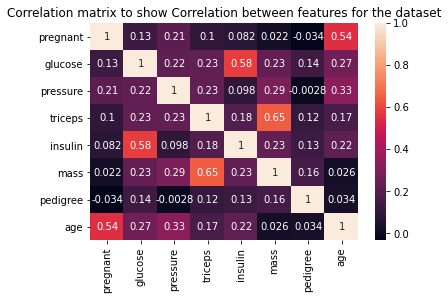

In [74]:
correlation_df = df.corr()
sns.heatmap(correlation_df, annot=True)
plt.title("Correlation matrix to show Correlation between features for the dataset")
plt.show()

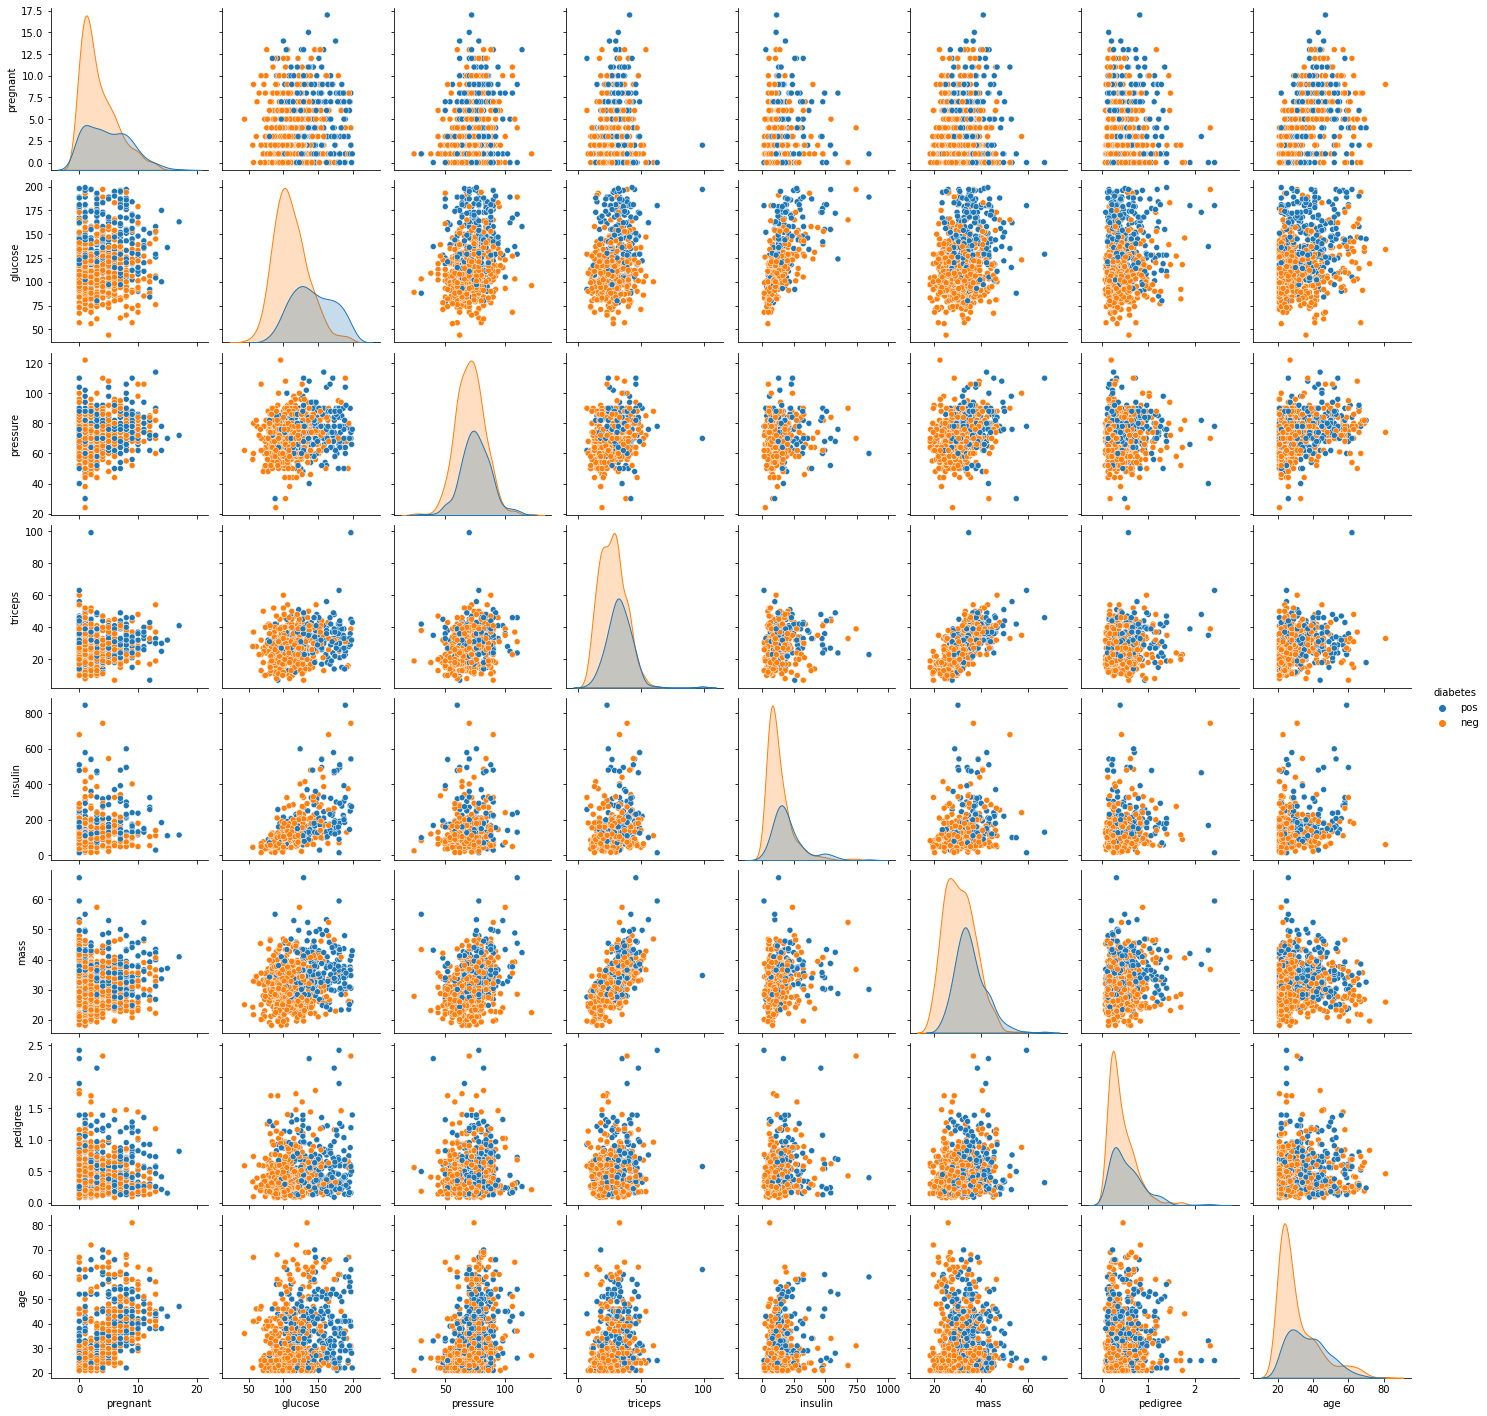

In [75]:
sns.pairplot(df, hue="diabetes");

In [76]:
def dist_plot(df,feature):
   sns.boxplot(data=df, x= "diabetes", y=feature)


def hist_plot(df,feature):
   sns.boxplot(data=df, x= feature)

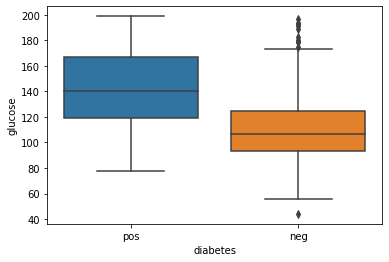

In [77]:
dist_plot(df,'glucose')

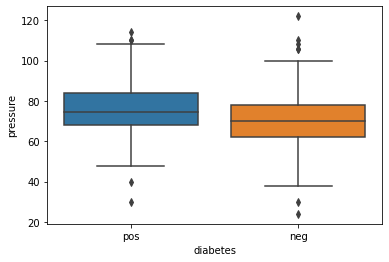

In [78]:
dist_plot(df,'pressure')

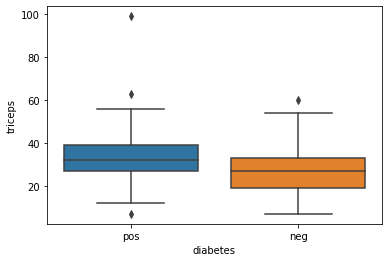

In [79]:
dist_plot(df,'triceps')

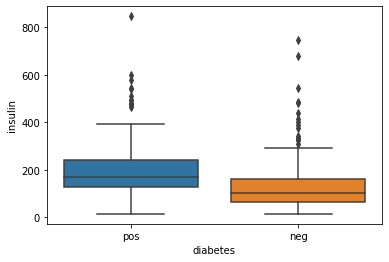

In [80]:
dist_plot(df,'insulin')

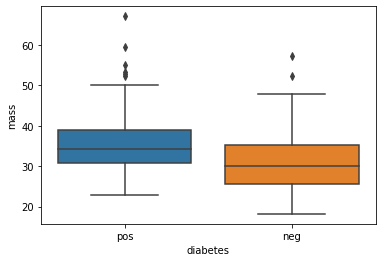

In [81]:
dist_plot(df,'mass')

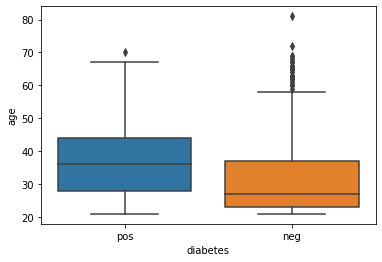

In [82]:
dist_plot(df,'age')

Glucose, Mass and Age features exhibit greater correlation with target variable than other features.

Higher glucose levels are associated with people having Diabetes.

Median Mass of people with diabetes is higher than the ones that dont have.

Median Age of people with diabetes is higher

# Question #2 -- Data preparation -- 10 points

Clean the data in preparation for Question #3

* Describe your strategy -- 3 points
* Implementation -- 4 points
  * If you change the data, minimize the impact on the dataset and justify your approach.
* Make sure your implementation is DRY -- 3 points

In [83]:
def data_prep(df):
  li=df.isnull().sum()
  for i,v in li.iteritems():
    if v!=0:
      median=df[i].median()
      df[i] = df[i].fillna(median)
  enc = preprocessing.LabelEncoder()
  df['diabetes']= enc.fit_transform(df['diabetes']) 
  return df

In [84]:
df=data_prep(df)


In [85]:
df.isnull().sum() 

pregnant    0
glucose     0
pressure    0
triceps     0
insulin     0
mass        0
pedigree    0
age         0
diabetes    0
dtype: int64

The data is cleaned by filling missing values with median values by imputation. Since the numerical data range is not having a broad range, normalization is not used.

Also, the diabetes field is encoded to ensure all fields are having numerical data

# Question #3 -- Logistic regression with statsmodels -- 10 points

Use the [statsmodels.Logit](https://www.statsmodels.org/stable/discretemod.html) module to develop a univariate model for diabetes and glocose. 

* Compare your coefficents to the result with a similar calculation computed wtih scikit-learn. Are they the same?
* Interpret the summary results from statsmodels. In particular, discuss the p-values and their implications.

Note: you may get runtime warnings. As long as you get the right coefficients, you can ignore the warnings. You can confirm that you get the right coefficients by comparing your statsmodels solution to the results you get in Question #4. **Extra credit:** If you debug the runtime warnings and explain (in your own words) what's going on, you'll get extra credit.  Don't spend a lot of time on this. I'm not expecting anyone to get it. And if you get help, then state where you got it.

In [86]:
import statsmodels.api as sm
diabetes=df['diabetes']
glucose = df['glucose']
glucose = sm.add_constant(glucose)
logistic_stats = sm.Logit(diabetes,glucose)
log_stats = logistic_stats.fit()
print(log_stats.summary())

Optimization terminated successfully.
         Current function value: 0.516692
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Sun, 08 Aug 2021   Pseudo R-squ.:                  0.2012
Time:                        03:59:35   Log-Likelihood:                -396.82
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.258e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7016      0.437    -13.049      0.000      -6.558      -4.845
glucose        0.0406      0.

In [87]:
from sklearn.linear_model import LogisticRegression

diabetes_lr=df[['diabetes']]
glucose_lr = df[['glucose']] 
lgr = LogisticRegression(C=1e6)
lgr.fit(glucose_lr, diabetes_lr)
diabetes_pred = lgr.predict(glucose_lr)

w0 = lgr.intercept_
w1 = lgr.coef_[0]

print(w0)
print(w1)

[-5.70162617]
[0.04056459]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The computed values of parameters(constant and co-efficient) are almost identical using stats model and scikit learn model.

The value of constant is -5.7016 and co-eff is 0.0406.

# Question #4 -- Multivariate logistic regression with statsmodels -- 10 points

* Adapt the model in Question 3 to create a convenience function for running multi-variable models. -- 4 points
* Model results -- 2 points total
  * Use the convenience function to implement a 2-input model with "glucose" and "mass"
  * Use the convenience function ti implement a 2-input mdoel with "glucose" and "triceps"
  * Use the same convenience function to implement a 3-input model with "glucose", "mass" and "triceps"
* Discuss the major conclusion(s) you draw the results of these 3 models -- 4 points
  * What's the major takeaway?
  * Do results give you ideas about any hypotheses that you might want to test if you had more information?

In [88]:
def multivariate_reg(*args):
  trgt=df[['diabetes']]
  inp=df[[*args]]
  inp = sm.add_constant(inp)
  logistic_stats = sm.Logit(trgt,inp)
  lgr = logistic_stats.fit()
  print(lgr.summary())


In [89]:
multivariate_reg('glucose', 'mass')

Optimization terminated successfully.
         Current function value: 0.489782
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  768
Model:                          Logit   Df Residuals:                      765
Method:                           MLE   Df Model:                            2
Date:                Sun, 08 Aug 2021   Pseudo R-squ.:                  0.2428
Time:                        03:59:35   Log-Likelihood:                -376.15
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 4.252e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2841      0.652    -12.708      0.000      -9.562      -7.006
glucose        0.0382      0.

In [90]:
multivariate_reg('glucose', 'triceps')

Optimization terminated successfully.
         Current function value: 0.506107
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  768
Model:                          Logit   Df Residuals:                      765
Method:                           MLE   Df Model:                            2
Date:                Sun, 08 Aug 2021   Pseudo R-squ.:                  0.2175
Time:                        03:59:35   Log-Likelihood:                -388.69
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.185e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8264      0.546    -12.493      0.000      -7.897      -5.755
glucose        0.0392      0.

In [91]:
multivariate_reg('glucose','mass','triceps')

Optimization terminated successfully.
         Current function value: 0.489416
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  768
Model:                          Logit   Df Residuals:                      764
Method:                           MLE   Df Model:                            3
Date:                Sun, 08 Aug 2021   Pseudo R-squ.:                  0.2433
Time:                        03:59:35   Log-Likelihood:                -375.87
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 3.999e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3452      0.659    -12.666      0.000      -9.637      -7.054
glucose        0.0381      0.

From the evaluations, Glucose and Mass are good features to the model, whereas Triceps is not a good feature to consider as it has p value greater than 0.05

When p<0.05, H0 is rejected and H1 is considered. If there exists greater correlation between the target and features, more testing would have been carried and p values would have been compared to either accept H0 or H1

# Question #5: 1-D logistic regression with scikit-learn -- 10 points

Use scikit-learn for the univariate model (diabetes vs glucose) and confirm that you get the same result as above (5 points). Recreate the plot that from that shows the probability of predicting class "pos" (5 points)

[-5.70162617]
[0.04056459]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


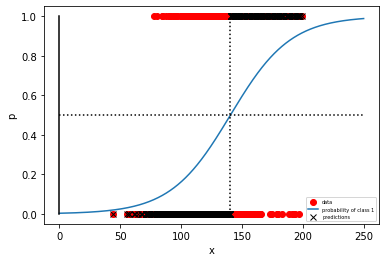

In [92]:
diabetes=df[['diabetes']]
glucose = df[['glucose']]

lgr = LogisticRegression(C=1e6) 
lgr.fit(glucose, diabetes)
diabetes_pred = lgr.predict(glucose)

plt.plot(glucose, diabetes, 'ro', label='data')

w0 = lgr.intercept_
w1 = lgr.coef_[0]
print(w0)
print(w1)

x = np.arange(0,250,.01)
y = w0 + (w1 * x)
p = 1 / (1 + np.exp(-y))

plt.plot(x, p, label='probability of class 1');

plt.plot(glucose, diabetes_pred, 'xk', label='predictions')

plt.plot([0, 0], [0, 1], 'k')

x_0 = - w0 / w1
plt.plot([x_0, x_0], [0, 1], ':k')

plt.plot([0, 250], [0.5, .5], ':k')
plt.legend(loc='lower right', fontsize=5)
plt.xlabel('x')
plt.ylabel('p');

In [93]:
d_values=df['diabetes']
type(d_values)
d_values=list(d_values)
type(d_values)
d_values=np.array(d_values)
diabetes_pred=np.array(diabetes_pred) #make it the same array as y
print(d_values)
print(diabetes_pred)
print(d_values.shape)
print(diabetes_pred.shape)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

Constant and coefficient are same as above as displayed

# Question #6: Balanced dataset -- 10 points

* Compute and plot/print the confusion matrix for the univariate model -- 2 points
* Balance the dataset used in the univariate model -- 4 points
  * use sklearn.utils.resample to downsample the majority class
* Explain the results with balanced and unbalanced datasets -- 4 points
  * use sklearn.metrics modules: precision_score, recall_score, f1_score

In [94]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

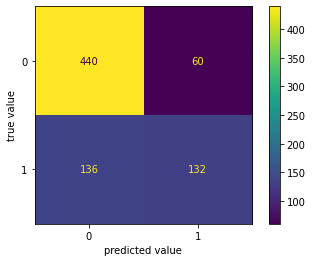

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lgr, glucose, diabetes, values_format = '')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('unbalanced')
print('Accuracy: %.3f' % accuracy_score(y_true=diabetes, y_pred=diabetes_pred))
print('Precision: %.3f' % precision_score(y_true=diabetes, y_pred=diabetes_pred))
print('Recall: %.3f' % recall_score(y_true=diabetes, y_pred=diabetes_pred))
print('F1: %.3f' % f1_score(y_true=diabetes, y_pred=diabetes_pred))

unbalanced
Accuracy: 0.745
Precision: 0.688
Recall: 0.493
F1: 0.574


In [97]:
from sklearn.utils import resample

df_majority = df[df.diabetes==0]
df_minority = df[df.diabetes==1]
 

df_majority_downsampled = resample(df_majority, replace=False, n_samples=268, random_state=123) 
 
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.diabetes.value_counts()

1    268
0    268
Name: diabetes, dtype: int64

In [98]:
df_majority

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
10,4,110.0,92.0,29.0,125.0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.0,125.0,22.5,0.142,33,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0


In [99]:
balance_x=df_downsampled[["glucose"]]
balance_y=df_downsampled[["diabetes"]]
lr = LogisticRegression(C=1e5) 
lr.fit(balance_x, balance_y)
y_pred=lr.predict(balance_x)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


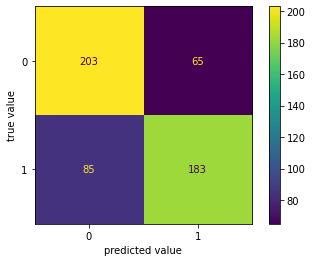

In [100]:
plot_confusion_matrix(lr, balance_x, balance_y, values_format = '') 
plt.xlabel('predicted value')
plt.ylabel('true value');

In [101]:
print('balanced dataset')
print('Accuracy: %.3f' % accuracy_score(y_true=balance_y, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=balance_y, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=balance_y, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=balance_y, y_pred=y_pred))

balanced dataset
Accuracy: 0.720
Precision: 0.738
Recall: 0.683
F1: 0.709


Precision, recall and F1 score increase for balanced dataset, though accuracy is high for unbalanced data. Model is working better on balanced data.

# Question #7: Optimizing the classification model -- 10 points

Use GridSearchCV to investigate the optimal value for regularization parameter "C". Plot the results and report the optimal value. -- 5 points

Plot the ROC curve, and discuss the difference with the model presented in class. -- 5 points


In [102]:
from sklearn.model_selection import GridSearchCV
import numpy as np

Cs=np.logspace(-7,7,10)
print(Cs)
grid={"C":np.logspace(-5,5,1)}

lgr_cv=GridSearchCV(LogisticRegression(),grid,cv=20)
x=df[['glucose']].values
y=df[['diabetes']].values
lgr_cv.fit(x,np.ravel(y))
print('regularization parameter best:',lgr_cv.best_params_)
print("accuracy :",lgr_cv.best_score_)


print(lgr_cv.cv_results_)



[1.00000000e-07 3.59381366e-06 1.29154967e-04 4.64158883e-03
 1.66810054e-01 5.99484250e+00 2.15443469e+02 7.74263683e+03
 2.78255940e+05 1.00000000e+07]
regularization parameter best: {'C': 1e-05}
accuracy : 0.7423414304993253
{'mean_fit_time': array([0.00667882]), 'std_fit_time': array([0.00049766]), 'mean_score_time': array([0.00039376]), 'std_score_time': array([2.23610032e-05]), 'param_C': masked_array(data=[1e-05],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-05}], 'split0_test_score': array([0.74358974]), 'split1_test_score': array([0.76923077]), 'split2_test_score': array([0.74358974]), 'split3_test_score': array([0.74358974]), 'split4_test_score': array([0.76923077]), 'split5_test_score': array([0.69230769]), 'split6_test_score': array([0.76923077]), 'split7_test_score': array([0.58974359]), 'split8_test_score': array([0.73684211]), 'split9_test_score': array([0.76315789]), 'split10_test_score': array([0.78947368]), 'split11_

The optimal value of C is 1e-05

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


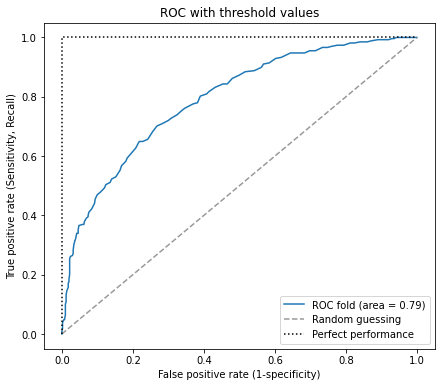

In [103]:
from sklearn.metrics import roc_curve, auc

y=df[['diabetes']]
X = df[['glucose']] #reassigning just for clarity




fig = plt.figure(figsize=(7, 6))


probas = lgr.fit(X, y).predict_proba(X)


fpr, tpr, thresholds = roc_curve(y, probas[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC fold (area = {:0.2f})'.format(roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title('ROC with threshold values')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (Sensitivity, Recall)')
plt.legend(loc="lower right");

ROC Curve area is 0.79, greater than half the area of the grid. It is a good model.

Roc curve in class has 0.90 which is better than the curve.